# Lab - working with online data 

In this Lab , you will load , clean and store online flights data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
%matplotlib inline

In [4]:
import requests
import json


# Load the data

In [3]:
r = requests.get("https://data.gov.il/api/3/action/datastore_search?resource_id=e83f763b-b7d7-479e-b172-ae981ddc6de5&limit=5000")

In [4]:
res = json.loads(r.content)

In [5]:
df = pd.DataFrame(res['result']['records'])

In [8]:
df.shape

(1162, 18)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162 entries, 0 to 1161
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   _id       1162 non-null   int64 
 1   CHOPER    1162 non-null   object
 2   CHFLTN    1162 non-null   object
 3   CHOPERD   1162 non-null   object
 4   CHSTOL    1162 non-null   object
 5   CHPTOL    1162 non-null   object
 6   CHAORD    1162 non-null   object
 7   CHLOC1    1162 non-null   object
 8   CHLOC1D   1162 non-null   object
 9   CHLOC1TH  1162 non-null   object
 10  CHLOC1T   1162 non-null   object
 11  CHLOC1CH  1162 non-null   object
 12  CHLOCCT   1162 non-null   object
 13  CHTERM    1162 non-null   int64 
 14  CHCINT    423 non-null    object
 15  CHCKZN    423 non-null    object
 16  CHRMINE   1162 non-null   object
 17  CHRMINH   1162 non-null   object
dtypes: int64(2), object(16)
memory usage: 163.5+ KB


## display the first rows 

In [6]:
df.head(10)

,_id,CHOPER,CHFLTN,CHOPERD,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1TH,CHLOC1T,CHLOC1CH,CHLOCCT,CHTERM,CHCINT,CHCKZN,CHRMINE,CHRMINH
0,1,6H,727,ISRAIR AIRLINES,2024-03-12T16:50:00,2024-03-12T17:20:00,D,BUD,BUDAPEST,בודפשט,BUDAPEST,הונגריה,HUNGARY,3,47-50,B,DEPARTED,המריאה
1,2,AA,387,AMERICAN AIRLINES,2024-03-12T17:30:00,2024-03-12T17:22:00,A,FCO,ROME - FIUMICINO,רומא,ROME,איטליה,ITALY,3,None,None,LANDED,נחתה
2,3,AR,7874,AEROLINEAS ARGENTINAS S.A.,2024-03-12T17:30:00,2024-03-12T17:22:00,A,FCO,ROME - FIUMICINO,רומא,ROME,איטליה,ITALY,3,None,None,LANDED,נחתה
3,4,LY,384,EL AL ISRAEL AIRLINES,2024-03-12T17:30:00,2024-03-12T17:22:00,A,FCO,ROME - FIUMICINO,רומא,ROME,איטליה,ITALY,3,None,None,LANDED,נחתה
4,5,SK,3166,SAS,2024-03-12T17:30:00,2024-03-12T17:22:00,A,FCO,ROME - FIUMICINO,רומא,ROME,איטליה,ITALY,3,None,None,LANDED,נחתה
5,6,TP,8897,AIR PORTUGAL,2024-03-12T17:30:00,2024-03-12T17:22:00,A,FCO,ROME - FIUMICINO,רומא,ROME,איטליה,ITALY,3,None,None,LANDED,נחתה
6,7,AM,7877,AERO MEXICO,2024-03-12T17:15:00,2024-03-12T17:26:00,D,LHR,LONDON - HEATHROW,לונדון,LONDON,בריטניה,UNITED KINGDOM,3,78-99,D,DEPARTED,המריאה
7,8,LY,317,EL AL ISRAEL AIRLINES,2024-03-12T17:15:00,2024-03-12T17:26:00,D,LHR,LONDON - HEATHROW,לונדון,LONDON,בריטניה,UNITED KINGDOM,3,78-99,D,DEPARTED,המריאה
8,9,AA,9258,AMERICAN AIRLINES,2024-03-12T16:40:00,2024-03-12T17:29:00,A,CDG,PARIS-CHARLES DE GAULLE,פריס,PARIS,צרפת,FRANCE,3,None,None,LANDED,נחתה
9,10,LY,320,EL AL ISRAEL AIRLINES,2024-03-12T16:40:00,2024-03-12T17:29:00,A,CDG,PARIS-CHARLES DE GAULLE,פריס,PARIS,צרפת,FRANCE,3,None,None,LANDED,נחתה


### display the last 10 rows - What's wrong? 

In [7]:
df.tail(10)

,_id,CHOPER,CHFLTN,CHOPERD,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1TH,CHLOC1T,CHLOC1CH,CHLOCCT,CHTERM,CHCINT,CHCKZN,CHRMINE,CHRMINH
1152,1153,SN,7171,BRUSSELS AIRLINES,2024-03-16T16:05:00,2024-03-16T16:05:00,A,MUC,MUNICH,מינכן,MUNICH,גרמניה,GERMANY,3,None,None,NOT FINAL,לא סופי
1153,1154,UA,9471,UNITED AIRLINES,2024-03-16T16:05:00,2024-03-16T16:05:00,A,MUC,MUNICH,מינכן,MUNICH,גרמניה,GERMANY,3,None,None,NOT FINAL,לא סופי
1154,1155,IZ,211,ARKIA ISRAELI AIRLINES,2024-03-16T16:30:00,2024-03-16T16:30:00,D,ATH,ATHENS,אתונה,ATHENS,יוון,GREECE,3,None,None,ON TIME,בזמן
1155,1156,LH,687,LUFTHANSA,2024-03-16T16:45:00,2024-03-16T16:45:00,D,FRA,FRANKFURT,פרנקפורט,FRANKFURT,גרמניה,GERMANY,3,None,None,ON TIME,בזמן
1156,1157,SN,7174,BRUSSELS AIRLINES,2024-03-16T16:45:00,2024-03-16T16:45:00,D,FRA,FRANKFURT,פרנקפורט,FRANKFURT,גרמניה,GERMANY,3,None,None,ON TIME,בזמן
1157,1158,UA,9123,UNITED AIRLINES,2024-03-16T16:45:00,2024-03-16T16:45:00,D,FRA,FRANKFURT,פרנקפורט,FRANKFURT,גרמניה,GERMANY,3,None,None,ON TIME,בזמן
1158,1159,IZ,828,ARKIA ISRAELI AIRLINES,2024-03-16T17:05:00,2024-03-16T17:05:00,A,ETM,RAMON,אילת - רמון,RAMON,ישראל,ISRAEL,3,None,None,NOT FINAL,לא סופי
1159,1160,LH,681,LUFTHANSA,2024-03-16T17:10:00,2024-03-16T17:10:00,D,MUC,MUNICH,מינכן,MUNICH,גרמניה,GERMANY,3,None,None,ON TIME,בזמן
1160,1161,LX,252,SWISS INT`L AIRLINES,2024-03-16T17:10:00,2024-03-16T17:10:00,A,ZRH,ZURICH,ציריך,ZURICH,שוויץ,SWITZERLAND,3,None,None,NOT FINAL,לא סופי
1161,1162,SN,7172,BRUSSELS AIRLINES,2024-03-16T17:10:00,2024-03-16T17:10:00,D,MUC,MUNICH,מינכן,MUNICH,גרמניה,GERMANY,3,None,None,ON TIME,בזמן


CHCINT CHCKZN ישנן 2 עמודות שאין בהן נתונים 

# clean the data

how many rows contains empty strings for each Column? (use a for loop to display the column name and percentage)

In [12]:

total_rows = len(df)


for column in df.columns:
    empty_rows = df[column].isnull().sum()
    percentage_empty = (empty_rows / total_rows) * 100

  
    print(f"Column: {column}, Percentage of empty rows: {percentage_empty:.2f}%")

Column: _id, Percentage of empty rows: 0.00%
Column: CHOPER, Percentage of empty rows: 0.00%
Column: CHFLTN, Percentage of empty rows: 0.00%
Column: CHOPERD, Percentage of empty rows: 0.00%
Column: CHSTOL, Percentage of empty rows: 0.00%
Column: CHPTOL, Percentage of empty rows: 0.00%
Column: CHAORD, Percentage of empty rows: 0.00%
Column: CHLOC1, Percentage of empty rows: 0.00%
Column: CHLOC1D, Percentage of empty rows: 0.00%
Column: CHLOC1TH, Percentage of empty rows: 0.00%
Column: CHLOC1T, Percentage of empty rows: 0.00%
Column: CHLOC1CH, Percentage of empty rows: 0.00%
Column: CHLOCCT, Percentage of empty rows: 0.00%
Column: CHTERM, Percentage of empty rows: 0.00%
Column: CHCINT, Percentage of empty rows: 63.60%
Column: CHCKZN, Percentage of empty rows: 63.60%
Column: CHRMINE, Percentage of empty rows: 0.00%
Column: CHRMINH, Percentage of empty rows: 0.00%


drop the empty rows  

In [43]:
df = df.drop(columns=['CHCINT','CHCKZN'])

format the current date with underscore separation (%d_%m_%y)

In [15]:
from datetime import datetime

current_date = datetime.now()

formatted_date = current_date.strftime('%d_%m_%y')

print("Formatted Date:", formatted_date)

Formatted Date: 13_03_24


Drop the _id column 

In [ ]:
df = df.drop(columns=['_id'])

In [19]:
df

,CHOPER,CHFLTN,CHOPERD,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1TH,CHLOC1T,CHLOC1CH,CHLOCCT,CHTERM,CHCINT,CHCKZN,CHRMINE,CHRMINH
0,6H,727,ISRAIR AIRLINES,2024-03-12T16:50:00,2024-03-12T17:20:00,D,BUD,BUDAPEST,בודפשט,BUDAPEST,הונגריה,HUNGARY,3,47-50,B,DEPARTED,המריאה
1,AA,387,AMERICAN AIRLINES,2024-03-12T17:30:00,2024-03-12T17:22:00,A,FCO,ROME - FIUMICINO,רומא,ROME,איטליה,ITALY,3,None,None,LANDED,נחתה
2,AR,7874,AEROLINEAS ARGENTINAS S.A.,2024-03-12T17:30:00,2024-03-12T17:22:00,A,FCO,ROME - FIUMICINO,רומא,ROME,איטליה,ITALY,3,None,None,LANDED,נחתה
3,LY,384,EL AL ISRAEL AIRLINES,2024-03-12T17:30:00,2024-03-12T17:22:00,A,FCO,ROME - FIUMICINO,רומא,ROME,איטליה,ITALY,3,None,None,LANDED,נחתה
4,SK,3166,SAS,2024-03-12T17:30:00,2024-03-12T17:22:00,A,FCO,ROME - FIUMICINO,רומא,ROME,איטליה,ITALY,3,None,None,LANDED,נחתה
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157,UA,9123,UNITED AIRLINES,2024-03-16T16:45:00,2024-03-16T16:45:00,D,FRA,FRANKFURT,פרנקפורט,FRANKFURT,גרמניה,GERMANY,3,None,None,ON TIME,בזמן
1158,IZ,828,ARKIA ISRAELI AIRLINES,2024-03-16T17:05:00,2024-03-16T17:05:00,A,ETM,RAMON,אילת - רמון,RAMON,ישראל,ISRAEL,3,None,None,NOT FINAL,לא סופי
1159,LH,681,LUFTHANSA,2024-03-16T17:10:00,2024-03-16T17:10:00,D,MUC,MUNICH,מינכן,MUNICH,גרמניה,GERMANY,3,None,None,ON TIME,בזמן
1160,LX,252,SWISS INT`L AIRLINES,2024-03-16T17:10:00,2024-03-16T17:10:00,A,ZRH,ZURICH,ציריך,ZURICH,שוויץ,SWITZERLAND,3,None,None,NOT FINAL,לא סופי


save the raw data (add the current date to the file name) 

In [21]:
new_file_name = f'cleandata_{formatted_date}.csv'

df.to_csv(new_file_name, index=False)

print(f"DataFrame saved to '{new_file_name}'")

DataFrame saved to 'cleandata_13_03_24.csv'


select the airline code and name without duplicates (CHOPER,CHOPERD)

In [22]:
airline_df = df[["CHOPER", "CHOPERD"]].drop_duplicates()

In [23]:
airline_df 

,CHOPER,CHOPERD
0,6H,ISRAIR AIRLINES
1,AA,AMERICAN AIRLINES
2,AR,AEROLINEAS ARGENTINAS S.A.
3,LY,EL AL ISRAEL AIRLINES
4,SK,SAS
5,TP,AIR PORTUGAL
6,AM,AERO MEXICO
11,QF,QANTAS AIRWAYS
12,TG,THAI AIRWAYS
13,W6,WIZZAIR


Load the file airlines.csv and merge it with a new data and save the file 'airline.csv'

In [34]:
airlines_df = pd.read_csv('airlines.csv')

merged_df = pd.concat([airlines_df, airline_df], ignore_index=True).drop_duplicates()

merged_df.to_csv('airline.csv', index=False)

Drop the Airline name column 

In [32]:
df = df.drop(columns=['CHOPERD'])

In [33]:
df

,CHOPER,CHFLTN,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1TH,CHLOC1T,CHLOC1CH,CHLOCCT,CHTERM,CHCINT,CHCKZN,CHRMINE,CHRMINH
0,6H,727,2024-03-12T16:50:00,2024-03-12T17:20:00,D,BUD,BUDAPEST,בודפשט,BUDAPEST,הונגריה,HUNGARY,3,47-50,B,DEPARTED,המריאה
1,AA,387,2024-03-12T17:30:00,2024-03-12T17:22:00,A,FCO,ROME - FIUMICINO,רומא,ROME,איטליה,ITALY,3,None,None,LANDED,נחתה
2,AR,7874,2024-03-12T17:30:00,2024-03-12T17:22:00,A,FCO,ROME - FIUMICINO,רומא,ROME,איטליה,ITALY,3,None,None,LANDED,נחתה
3,LY,384,2024-03-12T17:30:00,2024-03-12T17:22:00,A,FCO,ROME - FIUMICINO,רומא,ROME,איטליה,ITALY,3,None,None,LANDED,נחתה
4,SK,3166,2024-03-12T17:30:00,2024-03-12T17:22:00,A,FCO,ROME - FIUMICINO,רומא,ROME,איטליה,ITALY,3,None,None,LANDED,נחתה
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157,UA,9123,2024-03-16T16:45:00,2024-03-16T16:45:00,D,FRA,FRANKFURT,פרנקפורט,FRANKFURT,גרמניה,GERMANY,3,None,None,ON TIME,בזמן
1158,IZ,828,2024-03-16T17:05:00,2024-03-16T17:05:00,A,ETM,RAMON,אילת - רמון,RAMON,ישראל,ISRAEL,3,None,None,NOT FINAL,לא סופי
1159,LH,681,2024-03-16T17:10:00,2024-03-16T17:10:00,D,MUC,MUNICH,מינכן,MUNICH,גרמניה,GERMANY,3,None,None,ON TIME,בזמן
1160,LX,252,2024-03-16T17:10:00,2024-03-16T17:10:00,A,ZRH,ZURICH,ציריך,ZURICH,שוויץ,SWITZERLAND,3,None,None,NOT FINAL,לא סופי


Do the same task with airports (CHLOC1,CHLOC1D) and save the file 'airports.csv'

In [35]:
airports_df = df[["CHLOC1", "CHLOC1D"]].drop_duplicates()

In [36]:
airports_df 

,CHLOC1,CHLOC1D
0,BUD,BUDAPEST
1,FCO,ROME - FIUMICINO
6,LHR,LONDON - HEATHROW
8,CDG,PARIS-CHARLES DE GAULLE
10,BKK,BANGKOK INTL.-SUVARNABHUMI
13,SOF,SOFIA
14,TBS,TBILISI
15,MAD,MADRID
20,ATH,ATHENS
22,PRG,PRAGUE-RUZYNE


In [37]:
airport_df = pd.read_csv('airports.csv')

merged_df = pd.concat([airport_df, airports_df], ignore_index=True).drop_duplicates()

merged_df.to_csv('airport.csv', index=False)

In [41]:
df = df.drop(columns=['CHLOC1D'])

drop the hebrew columns 'CHLOC1TH','CHLOC1CH','CHRMINH'

In [38]:
df = df.drop(columns=['CHLOC1TH','CHLOC1CH','CHRMINH'])

In [44]:
df

,CHOPER,CHFLTN,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1T,CHLOCCT,CHTERM,CHRMINE
0,6H,727,2024-03-12T16:50:00,2024-03-12T17:20:00,D,BUD,BUDAPEST,HUNGARY,3,DEPARTED
1,AA,387,2024-03-12T17:30:00,2024-03-12T17:22:00,A,FCO,ROME,ITALY,3,LANDED
2,AR,7874,2024-03-12T17:30:00,2024-03-12T17:22:00,A,FCO,ROME,ITALY,3,LANDED
3,LY,384,2024-03-12T17:30:00,2024-03-12T17:22:00,A,FCO,ROME,ITALY,3,LANDED
4,SK,3166,2024-03-12T17:30:00,2024-03-12T17:22:00,A,FCO,ROME,ITALY,3,LANDED
...,...,...,...,...,...,...,...,...,...,...
1157,UA,9123,2024-03-16T16:45:00,2024-03-16T16:45:00,D,FRA,FRANKFURT,GERMANY,3,ON TIME
1158,IZ,828,2024-03-16T17:05:00,2024-03-16T17:05:00,A,ETM,RAMON,ISRAEL,3,NOT FINAL
1159,LH,681,2024-03-16T17:10:00,2024-03-16T17:10:00,D,MUC,MUNICH,GERMANY,3,ON TIME
1160,LX,252,2024-03-16T17:10:00,2024-03-16T17:10:00,A,ZRH,ZURICH,SWITZERLAND,3,NOT FINAL


In [45]:
new_file_name = f'cleandata_{formatted_date}.csv'

df.to_csv(new_file_name, index=False)

print(f"DataFrame saved to '{new_file_name}'")

DataFrame saved to 'cleandata_13_03_24.csv'


### rename the columns 

In [47]:
df =  pd.read_csv('cleandata_13_03_24.csv',names=['Airline','FlightNum','PlanTime','ActualTime','Direction','Airport','City','Country','Terminal','Status'],header=0)

In [48]:
df

,Airline,FlightNum,PlanTime,ActualTime,Direction,Airport,City,Country,Terminal,Status
0,6H,727,2024-03-12T16:50:00,2024-03-12T17:20:00,D,BUD,BUDAPEST,HUNGARY,3,DEPARTED
1,AA,387,2024-03-12T17:30:00,2024-03-12T17:22:00,A,FCO,ROME,ITALY,3,LANDED
2,AR,7874,2024-03-12T17:30:00,2024-03-12T17:22:00,A,FCO,ROME,ITALY,3,LANDED
3,LY,384,2024-03-12T17:30:00,2024-03-12T17:22:00,A,FCO,ROME,ITALY,3,LANDED
4,SK,3166,2024-03-12T17:30:00,2024-03-12T17:22:00,A,FCO,ROME,ITALY,3,LANDED
...,...,...,...,...,...,...,...,...,...,...
1157,UA,9123,2024-03-16T16:45:00,2024-03-16T16:45:00,D,FRA,FRANKFURT,GERMANY,3,ON TIME
1158,IZ,828,2024-03-16T17:05:00,2024-03-16T17:05:00,A,ETM,RAMON,ISRAEL,3,NOT FINAL
1159,LH,681,2024-03-16T17:10:00,2024-03-16T17:10:00,D,MUC,MUNICH,GERMANY,3,ON TIME
1160,LX,252,2024-03-16T17:10:00,2024-03-16T17:10:00,A,ZRH,ZURICH,SWITZERLAND,3,NOT FINAL


Change the PlanTime and ActualTime columns type to np.datetime64

In [49]:
df['PlanTime'] = pd.to_datetime(df['PlanTime'])
df['ActualTime'] = pd.to_datetime(df['ActualTime'])


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162 entries, 0 to 1161
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Airline     1162 non-null   object        
 1   FlightNum   1162 non-null   int64         
 2   PlanTime    1162 non-null   datetime64[ns]
 3   ActualTime  1162 non-null   datetime64[ns]
 4   Direction   1162 non-null   object        
 5   Airport     1162 non-null   object        
 6   City        1162 non-null   object        
 7   Country     1162 non-null   object        
 8   Terminal    1162 non-null   int64         
 9   Status      1162 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 90.9+ KB


Save the clean data 

In [51]:
df.to_csv('cleandata_13_03_24.csv', index=False)

update the file final.csv with departed, landed and canceled flights only

In [52]:
final_df = pd.read_csv('final.csv')

In [59]:
valid_statuses = ['DEPARTED', 'LANDED', 'CANCELED']
filtered_df = df[df['Status'].isin(valid_statuses)]

In [60]:
filtered_df

,Airline,FlightNum,PlanTime,ActualTime,Direction,Airport,City,Country,Terminal,Status
0,6H,727,2024-03-12 16:50:00,2024-03-12 17:20:00,D,BUD,BUDAPEST,HUNGARY,3,DEPARTED
1,AA,387,2024-03-12 17:30:00,2024-03-12 17:22:00,A,FCO,ROME,ITALY,3,LANDED
2,AR,7874,2024-03-12 17:30:00,2024-03-12 17:22:00,A,FCO,ROME,ITALY,3,LANDED
3,LY,384,2024-03-12 17:30:00,2024-03-12 17:22:00,A,FCO,ROME,ITALY,3,LANDED
4,SK,3166,2024-03-12 17:30:00,2024-03-12 17:22:00,A,FCO,ROME,ITALY,3,LANDED
...,...,...,...,...,...,...,...,...,...,...
334,AM,7853,2024-03-13 16:50:00,2024-03-13 17:07:00,D,CDG,PARIS,FRANCE,3,DEPARTED
335,LY,325,2024-03-13 16:50:00,2024-03-13 17:07:00,D,CDG,PARIS,FRANCE,3,DEPARTED
344,BZ,462,2024-03-13 16:10:00,2024-03-13 17:13:00,D,PRG,PRAGUE,CZECH REPUBLIC,3,DEPARTED
348,6H,561,2024-03-13 16:40:00,2024-03-13 17:15:00,D,ATH,ATHENS,GREECE,3,DEPARTED


In [61]:
updated_df = pd.concat([final_df, filtered_df], ignore_index=True).drop_duplicates()

In [63]:
updated_df.to_csv('final.csv', index=False)

Add a new column for total delay in minutes

In [12]:
updated_df['PlanTime'] = pd.to_datetime(updated_df['PlanTime'])
updated_df['ActualTime'] = pd.to_datetime(updated_df['ActualTime'])

In [13]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993 entries, 0 to 992
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Airline     993 non-null    object        
 1   FlightNum   993 non-null    object        
 2   PlanTime    993 non-null    datetime64[ns]
 3   ActualTime  993 non-null    datetime64[ns]
 4   Direction   993 non-null    object        
 5   Airport     993 non-null    object        
 6   City        993 non-null    object        
 7   Country     993 non-null    object        
 8   Terminal    993 non-null    int64         
 9   Status      993 non-null    object        
 10  TotalDelay  993 non-null    float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(7)
memory usage: 85.5+ KB


In [68]:
updated_df['TotalDelay'] = np.where(updated_df['ActualTime'] <= updated_df['PlanTime'], 0, (updated_df['ActualTime'] - updated_df['PlanTime']).dt.total_seconds() / 60)


In [5]:
updated_df = pd.read_csv('final.csv')

In [9]:
updated_df.head(10)

,Airline,FlightNum,PlanTime,ActualTime,Direction,Airport,City,Country,Terminal,Status,TotalDelay
0,LY,842,2024-03-12 16:50:00,2024-03-12 17:20:00,A,LGG,LIEGE,BELGIUM,3,LANDED,30.0
1,AA,146,2024-03-12 17:30:00,2024-03-12 17:22:00,A,JFK,NEW YORK,UNITED STATES,3,LANDED,0.0
2,USF,RCH18,2024-03-12 17:30:00,2024-03-12 17:22:00,D,RMS,RAMSTEIN,GERMANY,3,CANCELED,0.0
3,AHS,N120L,2024-03-12 17:30:00,2024-03-12 17:22:00,D,TEB,TETERBORO,UNITED STATES,3,DEPARTED,0.0
4,LH,687,2024-03-12 17:30:00,2024-03-12 17:22:00,D,FRA,FRANKFURT,GERMANY,3,DEPARTED,0.0
5,AA,8379,2024-03-12 17:30:00,2024-03-12 17:22:00,A,AMS,AMSTERDAM,NETHERLANDS,3,LANDED,0.0
6,LY,338,2024-03-12 17:15:00,2024-03-12 17:26:00,A,AMS,AMSTERDAM,NETHERLANDS,3,LANDED,11.0
7,LAU,9HSIS,2024-03-12 17:15:00,2024-03-12 17:26:00,D,WAW,WARSAW,POLAND,3,DEPARTED,11.0
8,460,4XCMC,2024-03-12 16:40:00,2024-03-12 17:29:00,D,BCM,BACAU,ROMANIA,3,DEPARTED,49.0
9,6H,665,2024-03-12 16:40:00,2024-03-12 17:29:00,D,DXB,DUBAI,UNITED ARAB EMIRATES,3,CANCELED,49.0


In [14]:
updated_df.to_csv('final.csv', index=False)

What is the average delay for departed flights

In [74]:
departed_flights = updated_df[updated_df['Status'] == 'DEPARTED']

average_delay = departed_flights['TotalDelay'].mean()

print(f"Average delay for departed flights: {average_delay:.2f} minutes")

Average delay for departed flights: 6.19 minutes


Display total delay distribution 

In [20]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993 entries, 0 to 992
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Airline     993 non-null    object        
 1   FlightNum   993 non-null    object        
 2   PlanTime    993 non-null    datetime64[ns]
 3   ActualTime  993 non-null    datetime64[ns]
 4   Direction   993 non-null    object        
 5   Airport     993 non-null    object        
 6   City        993 non-null    object        
 7   Country     993 non-null    object        
 8   Terminal    993 non-null    int64         
 9   Status      993 non-null    object        
 10  TotalDelay  993 non-null    float64       
 11  Month       993 non-null    int32         
dtypes: datetime64[ns](2), float64(1), int32(1), int64(1), object(7)
memory usage: 89.3+ KB


In [50]:
updated_df.head(10)

,Airline,FlightNum,PlanTime,ActualTime,Direction,Airport,City,Country,Terminal,Status,TotalDelay,Month,Weekday,Year
0,LY,842,2024-03-12 16:50:00,2024-03-12 17:20:00,A,LGG,LIEGE,BELGIUM,3,LANDED,30.0,3,1,2024
1,AA,146,2024-03-12 17:30:00,2024-03-12 17:22:00,A,JFK,NEW YORK,UNITED STATES,3,LANDED,0.0,3,1,2024
2,USF,RCH18,2024-03-12 17:30:00,2024-03-12 17:22:00,D,RMS,RAMSTEIN,GERMANY,3,CANCELED,0.0,3,1,2024
3,AHS,N120L,2024-03-12 17:30:00,2024-03-12 17:22:00,D,TEB,TETERBORO,UNITED STATES,3,DEPARTED,0.0,3,1,2024
4,LH,687,2024-03-12 17:30:00,2024-03-12 17:22:00,D,FRA,FRANKFURT,GERMANY,3,DEPARTED,0.0,3,1,2024
5,AA,8379,2024-03-12 17:30:00,2024-03-12 17:22:00,A,AMS,AMSTERDAM,NETHERLANDS,3,LANDED,0.0,3,1,2024
6,LY,338,2024-03-12 17:15:00,2024-03-12 17:26:00,A,AMS,AMSTERDAM,NETHERLANDS,3,LANDED,11.0,3,1,2024
7,LAU,9HSIS,2024-03-12 17:15:00,2024-03-12 17:26:00,D,WAW,WARSAW,POLAND,3,DEPARTED,11.0,3,1,2024
8,460,4XCMC,2024-03-12 16:40:00,2024-03-12 17:29:00,D,BCM,BACAU,ROMANIA,3,DEPARTED,49.0,3,1,2024
9,6H,665,2024-03-12 16:40:00,2024-03-12 17:29:00,D,DXB,DUBAI,UNITED ARAB EMIRATES,3,CANCELED,49.0,3,1,2024


Total Landing in Delay by Terminal

In [60]:
total_flights_by_terminal = updated_df['Terminal'].value_counts()

In [62]:
total_flights_by_terminal

Terminal
3    910
1     83
Name: count, dtype: int64

In [77]:
landed_flights = updated_df[updated_df['Status'] == 'LANDED']

In [79]:
total_landed_flights_by_terminal = landed_flights['Terminal'].value_counts()

In [80]:
total_landed_flights_by_terminal

Terminal
3    421
1     21
Name: count, dtype: int64

In [82]:
delayed_landed_flights_by_terminal = landed_flights[landed_flights['TotalDelay'] > 0]['Terminal'].value_counts()

In [83]:
delayed_landed_flights_by_terminal

Terminal
3    104
1     10
Name: count, dtype: int64

In [84]:
percent_delayed_landed_by_terminal = (delayed_landed_flights_by_terminal / total_landed_flights_by_terminal) * 100

In [85]:
percent_delayed_landed_by_terminal

Terminal
3    24.703088
1    47.619048
Name: count, dtype: float64

Total Delayed Departured by Terminal

In [113]:
departed_flights = updated_df[updated_df['Status'] == 'DEPARTED']

In [114]:
total_departed_flights_by_terminal = departed_flights['Terminal'].value_counts()

In [115]:
total_departed_flights_by_terminal

Terminal
3    405
1     51
Name: count, dtype: int64

In [116]:
delayed_departed_flights_by_terminal = departed_flights[departed_flights['TotalDelay'] > 0]['Terminal'].value_counts()

In [117]:
delayed_departed_flights_by_terminal

Terminal
3    99
1    15
Name: count, dtype: int64

In [118]:
percent_delayed_departed_by_terminal = (delayed_departed_flights_by_terminal / total_departed_flights_by_terminal) * 100

In [119]:
percent_delayed_departed_by_terminal

Terminal
3    24.444444
1    29.411765
Name: count, dtype: float64

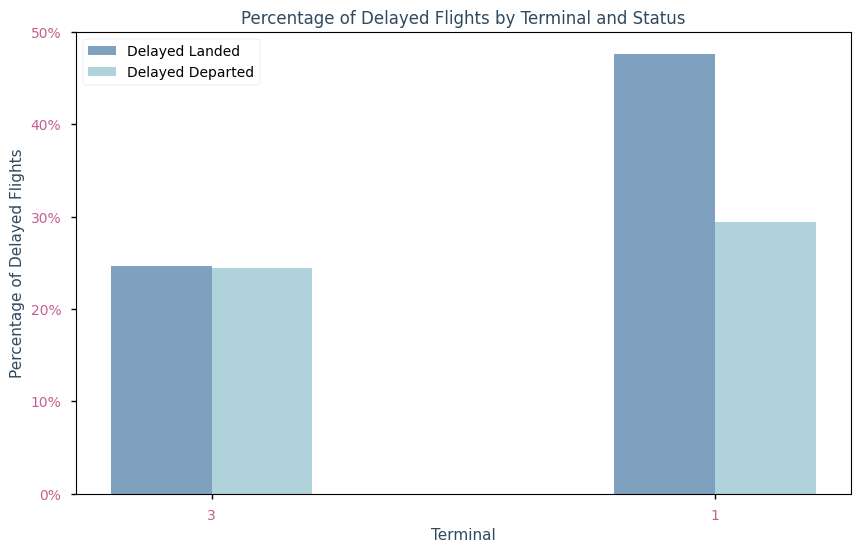

In [146]:
plt.figure(figsize=(10, 6))
bar_width = 0.2
index = range(len(percent_delayed_landed_by_terminal))
plt.bar(index, percent_delayed_landed_by_terminal, bar_width, label='Delayed Landed', color='#7DA1BF')
plt.bar([i + bar_width for i in index], percent_delayed_departed_by_terminal, bar_width, label='Delayed Departed', color='#B0D2DA')
plt.xlabel('Terminal',color='#2F4A60')
plt.ylabel('Percentage of Delayed Flights', color='#2F4A60')
plt.title('Percentage of Delayed Flights by Terminal and Status',color='#2F4A60')
plt.yticks([0,10,20,30,40,50],labels = ['0%','10%','20%','30%','40%','50%'],color='#C45F90')
plt.xticks([i + bar_width / 2 for i in index], percent_delayed_landed_by_terminal.index,color='#C45F90')
plt.legend()
plt.show()

Canceled Flights by Terminal

In [149]:
canceled_flights = updated_df[updated_df['Status'] == 'CANCELED']

In [150]:
total_canceled_flights_by_terminal = canceled_flights['Terminal'].value_counts()

In [152]:
total_canceled_flights_by_terminal

Terminal
3    84
1    11
Name: count, dtype: int64

In [153]:
percent_canceled_by_terminal = (total_canceled_flights_by_terminal / total_flights_by_terminal) * 100

In [154]:
percent_canceled_by_terminal

Terminal
3     9.230769
1    13.253012
Name: count, dtype: float64

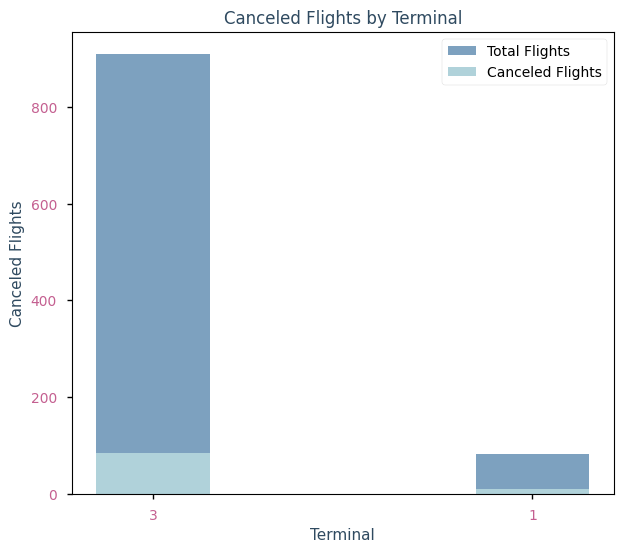

In [201]:
plt.figure(figsize=(7, 6))
index = range(len(total_flights_by_terminal))
plt.bar(index,total_flights_by_terminal,width=0.3,label='Total Flights',color='#7DA1BF')
plt.bar(index,total_canceled_flights_by_terminal,width=0.3,label='Canceled Flights',color='#B0D2DA')
plt.title('Canceled Flights by Terminal',color='#2F4A60')
plt.xlabel('Terminal',color='#2F4A60')
plt.ylabel('Canceled Flights',color='#2F4A60')
plt.xticks(index, total_flights_by_terminal.index,color='#C45F90')
plt.yticks(color='#C45F90')
plt.legend()
plt.show()

In [202]:
updated_df.head(10)

,Airline,FlightNum,PlanTime,ActualTime,Direction,Airport,City,Country,Terminal,Status,TotalDelay,Month,Weekday,Year
0,LY,842,2024-03-12 16:50:00,2024-03-12 17:20:00,A,LGG,LIEGE,BELGIUM,3,LANDED,30.0,3,1,2024
1,AA,146,2024-03-12 17:30:00,2024-03-12 17:22:00,A,JFK,NEW YORK,UNITED STATES,3,LANDED,0.0,3,1,2024
2,USF,RCH18,2024-03-12 17:30:00,2024-03-12 17:22:00,D,RMS,RAMSTEIN,GERMANY,3,CANCELED,0.0,3,1,2024
3,AHS,N120L,2024-03-12 17:30:00,2024-03-12 17:22:00,D,TEB,TETERBORO,UNITED STATES,3,DEPARTED,0.0,3,1,2024
4,LH,687,2024-03-12 17:30:00,2024-03-12 17:22:00,D,FRA,FRANKFURT,GERMANY,3,DEPARTED,0.0,3,1,2024
5,AA,8379,2024-03-12 17:30:00,2024-03-12 17:22:00,A,AMS,AMSTERDAM,NETHERLANDS,3,LANDED,0.0,3,1,2024
6,LY,338,2024-03-12 17:15:00,2024-03-12 17:26:00,A,AMS,AMSTERDAM,NETHERLANDS,3,LANDED,11.0,3,1,2024
7,LAU,9HSIS,2024-03-12 17:15:00,2024-03-12 17:26:00,D,WAW,WARSAW,POLAND,3,DEPARTED,11.0,3,1,2024
8,460,4XCMC,2024-03-12 16:40:00,2024-03-12 17:29:00,D,BCM,BACAU,ROMANIA,3,DEPARTED,49.0,3,1,2024
9,6H,665,2024-03-12 16:40:00,2024-03-12 17:29:00,D,DXB,DUBAI,UNITED ARAB EMIRATES,3,CANCELED,49.0,3,1,2024


Delayed Flights by Airline

In [226]:
delayed_flights_by_airline = updated_df[updated_df['TotalDelay'] > 0]['Airline'].value_counts()

In [230]:
top_10_airlines = delayed_flights_by_airline.nlargest(10)

In [231]:
top_10_airlines

Airline
LY     46
6H     18
FR     14
IZ     14
QAS    11
TK     11
AM      9
AA      7
AHS     6
AR      6
Name: count, dtype: int64

In [250]:
custom_colors =['#B0D2DA','#CAB29F','#7DA1BF','#2F4A60','#006884','#053D57','#F2F1EF','#41729F','#0E86D4','#055C9D']

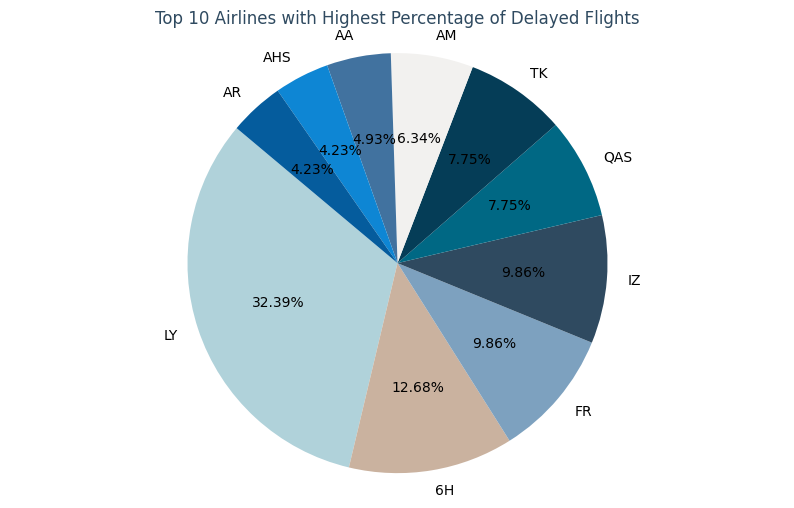

In [251]:
plt.figure(figsize=(10, 6))
plt.pie(top_10_airlines, labels=top_10_airlines.index, autopct='%1.2f%%', startangle=140,colors=custom_colors)
plt.title('Top 10 Airlines with Highest Percentage of Delayed Flights',color='#2F4A60')
plt.axis('equal')  
plt.show()

delayed flights per hour

In [253]:
departed_flights = updated_df[updated_df['Status'] == 'DEPARTED']

In [254]:
departed_flights['Hour'] = departed_flights['ActualTime'].dt.hour

C:\Users\liorr\AppData\Local\Temp\ipykernel_18964\3929926851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  departed_flights['Hour'] = departed_flights['ActualTime'].dt.hour


In [255]:
sum_delayed_departed_flights_per_hour = departed_flights[departed_flights['TotalDelay'] > 0].groupby('Hour').size()

In [259]:
sum_delayed_departed_flights_per_hour

Hour
0      1
1      7
2      2
3      3
4      1
5      4
6     17
8      1
9     10
10    10
11     2
12     6
13     8
14     5
15     4
16    10
17    10
18     1
19     1
20     6
21     2
23     3
dtype: int64

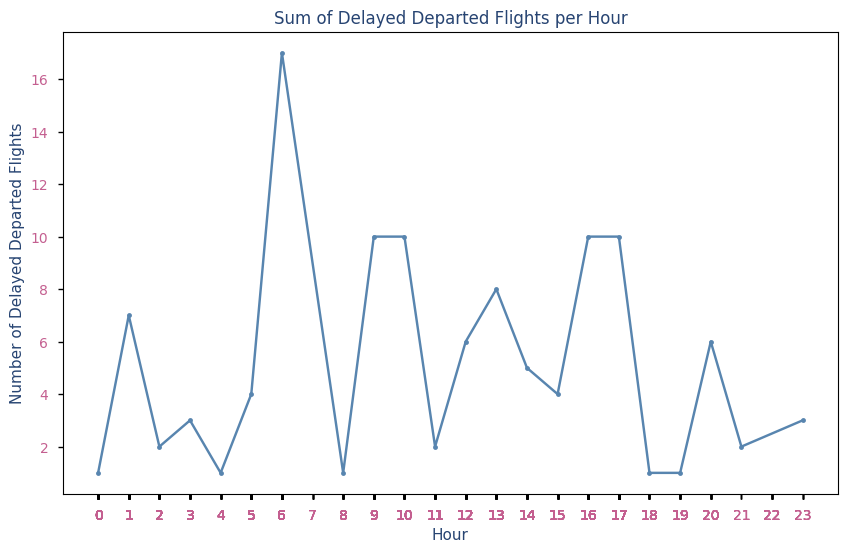

In [267]:
plt.figure(figsize=(10, 6))
plt.plot(sum_delayed_departed_flights_per_hour.index, sum_delayed_departed_flights_per_hour.values, marker='.', linestyle='-',color='#5885AF')
plt.title('Sum of Delayed Departed Flights per Hour',color='#274472')
plt.xlabel('Hour',color='#274472')
plt.ylabel('Number of Delayed Departed Flights',color='#274472')
plt.yticks(color='#C45F90')
plt.xticks(departed_flights['Hour'],color='#C45F90')
plt.show()

Delayed Flights by week day

In [268]:
departed_flights['Weekday'] = departed_flights['ActualTime'].dt.dayofweek

C:\Users\liorr\AppData\Local\Temp\ipykernel_18964\3090938917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  departed_flights['Weekday'] = departed_flights['ActualTime'].dt.dayofweek


In [269]:
sum_delayed_departed_flights_per_weekday = departed_flights[departed_flights['TotalDelay'] > 0].groupby('Weekday').size()

In [270]:
sum_delayed_departed_flights_per_weekday

Weekday
1    17
2    97
dtype: int64

In [271]:
avg_delay_per_minute_per_weekday = departed_flights.groupby('Weekday')['TotalDelay'].mean()

In [272]:
avg_delay_per_minute_per_weekday

Weekday
1    13.444444
2    15.381250
3     0.000000
4     0.000000
Name: TotalDelay, dtype: float64

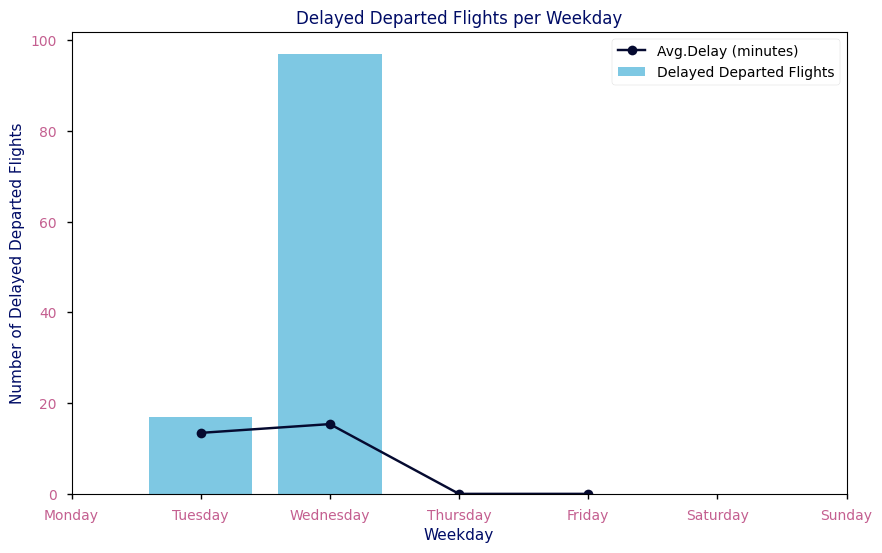

In [285]:
plt.figure(figsize=(10, 6))
plt.bar(sum_delayed_departed_flights_per_weekday.index, sum_delayed_departed_flights_per_weekday.values, color='#7EC8E3',label='Delayed Departed Flights')
plt.plot(avg_delay_per_minute_per_weekday.index, avg_delay_per_minute_per_weekday.values, marker='o', linestyle='-',color='#050A30',label='Avg.Delay (minutes)')
plt.title('Delayed Departed Flights per Weekday',color='#000C66')
plt.xlabel('Weekday',color='#000C66')
plt.ylabel('Number of Delayed Departed Flights',color='#000C66')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],color='#C45F90')
plt.yticks(color='#C45F90')
plt.legend()
plt.show()